In [1]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
cord_file = "D:/cord.csv"
citi_file = "D:/dist.csv"
#best_dist = 33523

city_df = pd.read_csv(citi_file,header=None)
cord_df = pd.read_csv(cord_file)
cord_df = cord_df.drop(['Unnamed: 0'],axis=1)


In [3]:
cord_arr = np.array(cord_df)
city_dist_arr = np.array(city_df)

In [6]:
class Ant():
    def __init__(self,maze,start_point,attractions,pheromons,a,b):
        self.dist_travelled = 0

        self.attractions = attractions
        self.path = []
        self.pheromons = pheromons
        self.maze = maze
        self.a = a
        self.b = b
        self.start_point = start_point
        self.visited_attractions = [self.start_point]

             
    def create_random_path(self):
        self.path = [self.start_point]
        count=0
        while(len(self.path)<self.attractions and count<100):
            random_number = random.randint(0,self.attractions-1)
            if random_number not in self.path:
                self.path.append(random_number)
    
    def make_heuristics(self):
        for i in range(self.attractions-1):
            self.dist_travelled += self.maze[self.path[i]][self.path[i+1]]
            
    def add_pheromons(self):
        #print(self.attractions)
        for i in range(self.attractions-1):
            self.pheromons[self.path[i]][self.path[i+1]] += 1.0/self.dist_travelled
            
    
    def create_roulette_wheel(self,current_attraction):
        roulette_dict = dict()
        sum_phero_heuric = 0
        remaining_attractions = self.attractions - len(self.visited_attractions)
        for i in range(self.attractions):
            if(i in self.visited_attractions):
                continue
            
            else:
                curr_pheromon = self.pheromons[current_attraction][i]
                curr_heuristic = 1.0/(0.00000001 + self.maze[current_attraction][i])
                numerator = (curr_pheromon**self.a) * (curr_heuristic**self.b)
                sum_phero_heuric += numerator
                roulette_dict[i] = numerator
        
        for j in roulette_dict.keys():
            roulette_dict[j] /= sum_phero_heuric
        
        best_move = max(roulette_dict,key=roulette_dict.get)
        return best_move
    
    def get_best_path(self):
        return self.path
    
    def get_best_score(self):
        return self.dist_travelled
    
    def get_pheromons(self):
        return self.pheromons
                
    def create_best_path(self):
        self.path = [self.start_point]
        for i in range(self.attractions-1):
            next_best_move = self.create_roulette_wheel(self.path[i])
            self.path.append(next_best_move)
            self.visited_attractions.append(next_best_move)
    
            

In [39]:
def solve(ants,epochs,maze,start_point,n_attractions,alpha,beta):
    ant_pheromons = np.ones((n_attractions,n_attractions))
    best_score = [1000000000000]
    best_path = []
    good_paths = []
    keep_running = True
    for i in range(epochs):
        print(i," best score : ",best_score[0])
        if(not keep_running):
            print("No further improvement possible, Breaking the loop...")
            break
        for j in range(ants):
            my_ant = Ant(maze=maze,
                        start_point=start_point,
                        attractions=n_attractions,
                        pheromons=ant_pheromons,
                        a=alpha,b=beta)
            if(i<2):
                my_ant.create_random_path()
            
            else:
                my_ant.create_best_path()
                
            my_ant.make_heuristics()
            my_ant.add_pheromons()
            ant_pheromons = my_ant.get_pheromons()
            score = my_ant.get_best_score()
            
            
            if(score == best_score[0]):
                keep_running = False
                break

            if(score<best_score[0]):
                good_paths.append(my_ant.get_best_path())
                best_score[0] = score

    best_path = my_ant.get_best_path()
            
    return good_paths


In [63]:
good_paths = solve(ants=1000,
                   epochs=11,
                   start_point=6,
                   maze=city_dist_arr,
                   n_attractions=48,
                   alpha=1,beta=1)

0  best score :  1000000000000
1  best score :  116937
2  best score :  116937
3  best score :  36508
No further improvement possible, Breaking the loop...


In [64]:
answers = np.array(good_paths[-1])
cords_of_ans = cord_arr[answers]

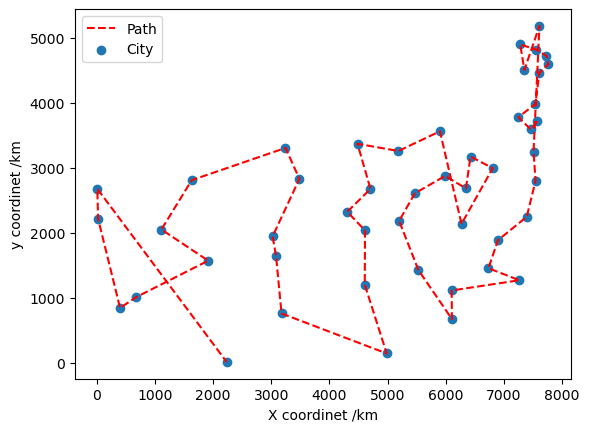

In [65]:
plt.plot(cords_of_ans[0:,0],cords_of_ans[0:,1],'--r')
plt.scatter(cord_arr[0:,0],cord_arr[0:,1])
plt.xlabel("X coordinet /km")
plt.ylabel("y coordinet /km")
plt.legend(['Path','City'])